In [65]:
%matplotlib inline

In [66]:
import pandas as pd

0. Podle Keplerových zákonů by pro všechny planety měl být konstantní poměr mezi třetí mocninou velké poloosy elipsy oběžné dráhy a druhou mocninou oběžné doby. Dokážeš to ověřit pomocí tabulky planety, kterou jsme si v hodině vytvořili?

In [67]:
planety = pd.DataFrame({
    "jmeno": ["Merkur", "Venuše", "Země", "Mars", "Jupiter", "Saturn", "Uran", "Neptun"],
    "symbol": ["☿", "♀", "⊕", "♂", "♃", "♄", "♅", "♆"],
    "obezna_poloosa": [0.39, 0.72, 1.00, 1.52, 5.20, 9.54, 19.22, 30.06],
    "obezna_doba": [0.24, 0.62, 1, 1.88, 11.86, 29.46, 84.01, 164.8],
})
planety = planety.set_index("jmeno")
planety

,symbol,obezna_poloosa,obezna_doba
jmeno,,,
Merkur,☿,0.39,0.24
Venuše,♀,0.72,0.62
Země,⊕,1.00,1.00
Mars,♂,1.52,1.88
Jupiter,♃,5.20,11.86
Saturn,♄,9.54,29.46
Uran,♅,19.22,84.01
Neptun,♆,30.06,164.80


In [68]:
planety["ratio"] = (planety["obezna_poloosa"] ** 3) / (planety["obezna_doba"] ** 2)
cats = planety["ratio"].astype("category")
d = dict(enumerate(cats.cat.categories))
if(len(d) > 1):
    print("No constant ratio.")
else:
    print("Constant ratio")
    
planety

No constant ratio.


,symbol,obezna_poloosa,obezna_doba,ratio
jmeno,,,,
Merkur,☿,0.39,0.24,1.029844
Venuše,♀,0.72,0.62,0.970989
Země,⊕,1.00,1.00,1.000000
Mars,♂,1.52,1.88,0.993608
Jupiter,♃,5.20,11.86,0.999633
Saturn,♄,9.54,29.46,1.000414
Uran,♅,19.22,84.01,1.006000
Neptun,♆,30.06,164.80,1.000121


1.Vytvoř vhodný graf, který velkou poloosu elipsy a oběžnou dobu spojuje.

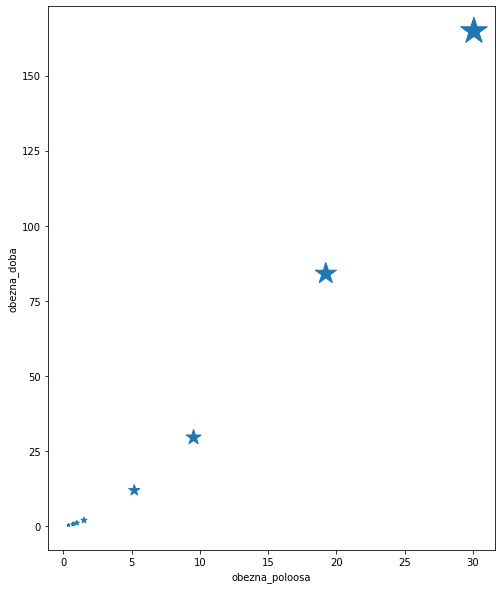

In [69]:
planety.plot.scatter(
    
    x = "obezna_poloosa", 
    y = "obezna_doba", 
    figsize=(8, 10),
    marker = "*", 
    s = planety["obezna_poloosa"] * 26

);

Použij tabulku countries z hodiny a: 

2. Přidej do tabulky zemí sloupce women_overweight, men_overweight, kde nadváhou zástupců příslušného pohlaví myslíme průměrné bmi > 25: 

In [70]:
countries = pd.read_csv("countries.csv", index_col = "name")
countries = countries.sort_index()
countries

,iso,world_6region,world_4region,income_groups,is_eu,is_oecd,eu_accession,year,area,population,alcohol_adults,bmi_men,bmi_women,car_deaths_per_100000_people,calories_per_day,infant_mortality,life_expectancy,life_expectancy_female,life_expectancy_male,un_accession
name,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,south_asia,asia,low_income,False,False,NaN,2018,652860.0,34500000.0,0.03,20.62,21.07,NaN,2090.0,66.3,58.69,65.812,63.101,1946-11-19
Albania,ALB,europe_central_asia,europe,upper_middle_income,False,False,NaN,2018,28750.0,3238000.0,7.29,26.45,25.66,5.978,3193.0,12.5,78.01,80.737,76.693,1955-12-14
Algeria,DZA,middle_east_north_africa,africa,upper_middle_income,False,False,NaN,2018,2381740.0,36980000.0,0.69,24.60,26.37,NaN,3296.0,21.9,77.86,77.784,75.279,1962-10-08
Andorra,AND,europe_central_asia,europe,high_income,False,False,NaN,2017,470.0,88910.0,10.17,27.63,26.43,NaN,NaN,2.1,82.55,NaN,NaN,1993-07-28
Angola,AGO,sub_saharan_africa,africa,upper_middle_income,False,False,NaN,2018,1246700.0,20710000.0,5.57,22.25,23.48,NaN,2473.0,96.0,65.19,64.939,59.213,1976-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,VEN,america,americas,upper_middle_income,False,False,NaN,2018,912050.0,30340000.0,7.60,27.45,28.13,7.332,2631.0,12.9,75.91,79.079,70.950,1945-11-15
Vietnam,VNM,east_asia_pacific,asia,lower_middle_income,False,False,NaN,2018,330967.0,90660000.0,3.91,20.92,21.07,NaN,2745.0,17.3,74.88,81.203,72.003,1977-09-20
Yemen,YEM,middle_east_north_africa,asia,lower_middle_income,False,False,NaN,2018,527970.0,26360000.0,0.20,24.44,26.11,NaN,2223.0,33.8,67.14,66.871,63.875,1947-09-30


In [71]:
def is_overweight(source_column : str, result_column : str, table : pd.DataFrame):
    countries[result_column] = countries[source_column] > 25
    return countries

In [72]:
countries = is_overweight("bmi_women", "women_overweight", countries)
countries = is_overweight("bmi_men", "men_overweight", countries)
countries

,iso,world_6region,world_4region,income_groups,is_eu,is_oecd,eu_accession,year,area,population,...,bmi_women,car_deaths_per_100000_people,calories_per_day,infant_mortality,life_expectancy,life_expectancy_female,life_expectancy_male,un_accession,women_overweight,men_overweight
name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,south_asia,asia,low_income,False,False,NaN,2018,652860.0,34500000.0,...,21.07,NaN,2090.0,66.3,58.69,65.812,63.101,1946-11-19,False,False
Albania,ALB,europe_central_asia,europe,upper_middle_income,False,False,NaN,2018,28750.0,3238000.0,...,25.66,5.978,3193.0,12.5,78.01,80.737,76.693,1955-12-14,True,True
Algeria,DZA,middle_east_north_africa,africa,upper_middle_income,False,False,NaN,2018,2381740.0,36980000.0,...,26.37,NaN,3296.0,21.9,77.86,77.784,75.279,1962-10-08,True,False
Andorra,AND,europe_central_asia,europe,high_income,False,False,NaN,2017,470.0,88910.0,...,26.43,NaN,NaN,2.1,82.55,NaN,NaN,1993-07-28,True,True
Angola,AGO,sub_saharan_africa,africa,upper_middle_income,False,False,NaN,2018,1246700.0,20710000.0,...,23.48,NaN,2473.0,96.0,65.19,64.939,59.213,1976-12-01,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,VEN,america,americas,upper_middle_income,False,False,NaN,2018,912050.0,30340000.0,...,28.13,7.332,2631.0,12.9,75.91,79.079,70.950,1945-11-15,True,True
Vietnam,VNM,east_asia_pacific,asia,lower_middle_income,False,False,NaN,2018,330967.0,90660000.0,...,21.07,NaN,2745.0,17.3,74.88,81.203,72.003,1977-09-20,False,False
Yemen,YEM,middle_east_north_africa,asia,lower_middle_income,False,False,NaN,2018,527970.0,26360000.0,...,26.11,NaN,2223.0,33.8,67.14,66.871,63.875,1947-09-30,True,False


3.Zjisti, v jakých zemích, které NEpatří do low_income group, mají průměrně méně než 3000 kalorií na den

In [89]:
countries[(countries["income_groups"] != "africa") & (countries["calories_per_day"] < 3000)][["income_groups", "calories_per_day"]]

,income_groups,calories_per_day
name,,
Afghanistan,low_income,2090.0
Angola,upper_middle_income,2473.0
Antigua and Barbuda,high_income,2417.0
Armenia,lower_middle_income,2928.0
Bahamas,high_income,2670.0
...,...,...
Venezuela,upper_middle_income,2631.0
Vietnam,lower_middle_income,2745.0
Yemen,lower_middle_income,2223.0


4.Napiš kód, který vytvoří graf bmi mužů a bmi žen v zemích EU. Zkus si pohrát i s parametry - nastav figsize, barvu...

In [91]:
barvy_regionu = {
    "europe" : "blue", 
    "asia" : "yellow", 
    "africa" : "black", 
    "americas" : "red"
}
barva = countries["world_4region"].map(barvy_regionu)

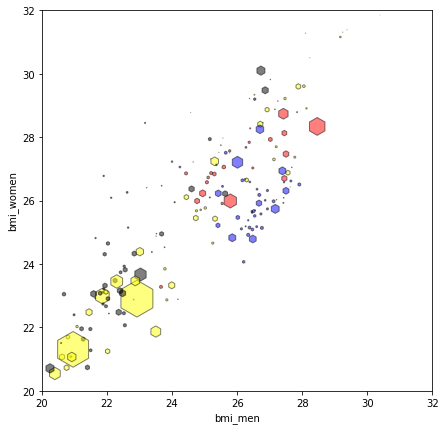

In [96]:
countries.plot.scatter(
    figsize=(7, 7),
    xlim=(20, 32),
    ylim=(20, 32), 
    x="bmi_men",
    y="bmi_women",
    marker="h",
    color=barva,    
    s=countries["population"] / 1e6,
    edgecolor="black",
    alpha=0.5
);

In [108]:
import plotly.express as px

px.scatter(
    countries.reset_index(),
    x="bmi_men",
    y="bmi_women",
    size="population",
    color="world_4region",
    hover_name="name"
)